<a href="https://colab.research.google.com/github/unitxero/Data_Analysis_MC/blob/main/Basic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Analysis

Regression analysis refers to the use of statistical methods to estimate the relationships between one or more independent variables and dependent variables. 

Regression is a powerful tool as it is used to assess the strength of the relationship between two or more variables, and then it would be used for modeling the relationship between those variables in the future.

[source](https://en.wikipedia.org/wiki/Regression_analysis)

# Building a basic regression model.

###*We know that a Linear regression is a way to model the relationship between two variables. We will use the equation as the slope formula. The equation has the form:* 

<font size =  6><center>$Y = \alpha + \beta X$</center></font>

*where `Y` is the dependent variable (that’s the variable on the vertical or `Y` axis).*

*`X` is the independent variable (i.e. it is plotted on the Horizonr=tal or `X` axis).*

 *`b` is the slope of the line and `a` is the `y-intercept`.*

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### To construct out analysis, first, let's generate some *'random'* data

In [ ]:
np.random.seed(10)
X = 2.5 * np.random.randn(1000) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(1000)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Actual values of Y

## Now, let's create a pandas dataframe to store our X and y values

In [ ]:
df = pd.DataFrame({'X': X,'y': y})

## Next, we want to calculate the mean of X and the mean y

####*The mean of an array refers to the sum of array elements divided by the number of elements.*

In [ ]:
xmean = np.mean(X)
ymean = np.mean(y)

###Now, we need to calculate the terms needed for the numator and denominator of beta to satisfy the line equation formula.

In [ ]:
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

### We can now calculate $\beta$ and $\alpha$.

*This is the formula for each...*

<font size="6"><center>$\alpha = \frac{\sum(y)\sum(x^2) - \sum(x)\sum(xy)}{n\sum(x^2) - (\sum(x))^2}$</center>
<br>
<center>$\beta = \frac{n\sum(xy) - \sum(x)\sum(y)}{n\sum(x^2) - (\sum(x))^2}$</center></font>


In [ ]:
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 1.9734233360735431
beta = 0.31436921108349586


###Great, we now have an estimate for alpha and beta!

<font size = 6><center>$y_{pred} = \alpha + \beta * X$</center></font></span>


In [ ]:
ypred = alpha + (beta*X)

Text(0, 0.5, 'y')

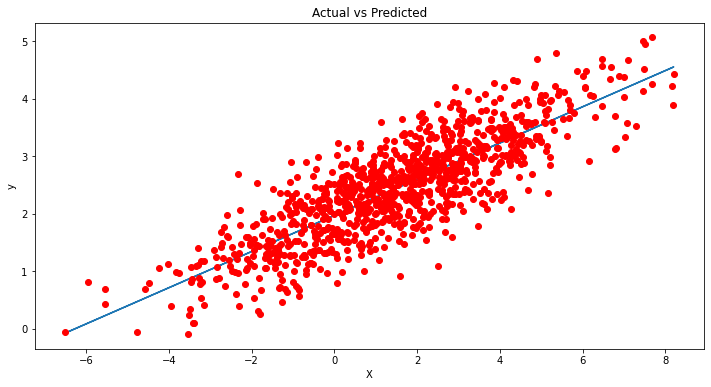

In [ ]:
# Let’s plot our prediction ypred against the actual values of y, 
# to get a better visual understanding of our model.

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')